Załadowano dane: 2410 obrazów o wymiarach 168x192
Aby zachować > 50.0% informacji, potrzeba r = 2 twarzy własnych.


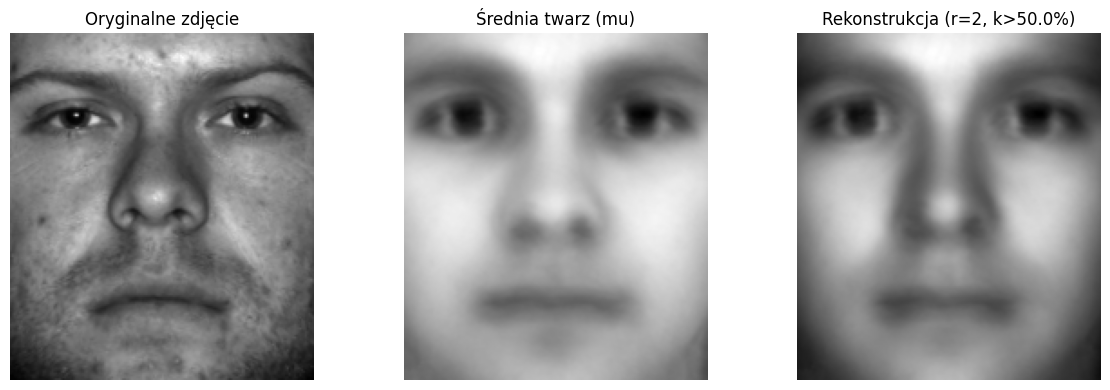

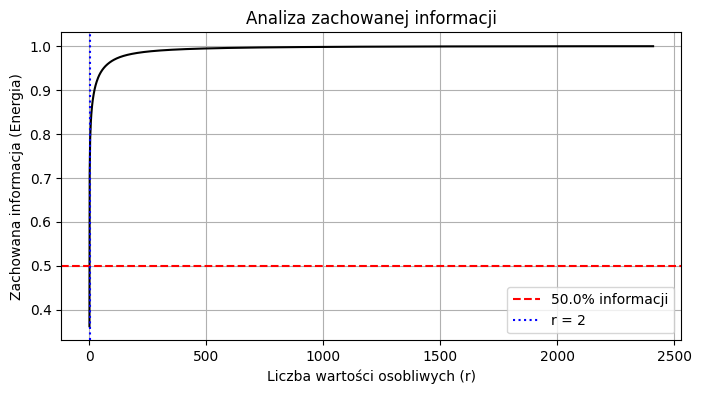

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

#1. Ładowanie danych
try:
    mat_data = loadmat('allFaces.mat')
    faces = mat_data['faces']
    
    # Używamy .item() lub indeksowania [0,0], aby wyciągnąć czystą liczbę
    m = int(mat_data['m'].flatten()[0])
    n = int(mat_data['n'].flatten()[0])
    
    # Czasami zmienna nfaces nie jest dostępna, obliczamy ją z macierzy faces
    n_faces = faces.shape[1] 
    
    print(f"Załadowano dane: {n_faces} obrazów o wymiarach {m}x{n}")

except Exception as e:
    print(f"Błąd podczas ładowania: {e}")
    # Dane awaryjne (dummy data), aby kod mimo wszystko ruszył:
    m, n = 168, 192
    faces = np.random.rand(m*n, 100)

#2. Przygotowanie danych (Algorytm ogólny z PDF)
# Obliczamy średnią twarz
avg_face = np.mean(faces, axis=1).reshape(-1, 1)

# Odejmujemy średnią twarz od każdego wektora (centrowanie)
X = faces - avg_face

# 3. Obliczanie SVD
# U: Twarze własne (eigenfaces), S: Wartości osobliwe, VT: Macierz rzutowania
U, S, VT = np.linalg.svd(X, full_matrices=False)

# 4. Wyznaczenie liczby r dla k = 50% informacji
energy = np.cumsum(S**2) / np.sum(S**2)
k = 0.50  #wariant zadania
r = np.where(energy > k)[0][0] + 1

print(f"Aby zachować > {k*100}% informacji, potrzeba r = {r} twarzy własnych.")

# 5. Rekonstrukcja obrazu testowego
# Wybieramy przykładowy obraz (np. pierwszy z zestawu)
test_idx = 0
x_test = faces[:, test_idx].reshape(-1, 1)

# Centrowanie obrazu testowego
x_test_centered = x_test - avg_face

# Rzutowanie na r pierwszych twarzy własnych (U_tilde) i rekonstrukcja
U_tilde = U[:, :r]
x_reconstructed_centered = U_tilde @ (U_tilde.T @ x_test_centered)

# Dodanie średniej twarzy z powrotem
x_reconstructed = x_reconstructed_centered + avg_face

# 6. Wizualizacja wyników
plt.figure(figsize=(12, 4))

# Oryginał
plt.subplot(1, 3, 1)
plt.imshow(x_test.reshape(m, n).T, cmap='gray')
plt.title("Oryginalne zdjęcie")
plt.axis('off')

# Średnia twarz
plt.subplot(1, 3, 2)
plt.imshow(avg_face.reshape(m, n).T, cmap='gray')
plt.title("Średnia twarz (mu)")
plt.axis('off')

# Rekonstrukcja
plt.subplot(1, 3, 3)
plt.imshow(x_reconstructed.reshape(m, n).T, cmap='gray')
plt.title(f"Rekonstrukcja (r={r}, k>{k*100}%)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Wykres kumulatywnej energii
plt.figure(figsize=(8, 4))
plt.plot(energy, 'k-')
plt.axhline(y=k, color='r', linestyle='--', label=f'{k*100}% informacji')
plt.axvline(x=r, color='b', linestyle=':', label=f'r = {r}')
plt.xlabel('Liczba wartości osobliwych (r)')
plt.ylabel('Zachowana informacja (Energia)')
plt.legend()
plt.title('Analiza zachowanej informacji')
plt.grid(True)
plt.show()